<a href="https://colab.research.google.com/github/Larrychen1133/RainPredictorML/blob/main/Predicting_Next_Day_Rain_Using_Various_ML_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing

In [ ]:
print('hello world')
!pip install category_encoders

hello world
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 908.0 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
weather_df = pd.read_csv("./weatherAUS.csv")
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
categorical_columns = weather_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical_columns = weather_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
for feature in categorical_columns:
  print("Number of unique categories in ", feature , " = ", len(weather_df[feature].unique()))

print("\n")

for feature in weather_df.columns:
  print("Percentage of na values in ", feature, " = ", (weather_df[feature].isna().sum())*100/145460)

Number of unique categories in  Date  =  3436
Number of unique categories in  Location  =  49
Number of unique categories in  WindGustDir  =  17
Number of unique categories in  WindDir9am  =  17
Number of unique categories in  WindDir3pm  =  17
Number of unique categories in  RainToday  =  3
Number of unique categories in  RainTomorrow  =  3


Percentage of na values in  Date  =  0.0
Percentage of na values in  Location  =  0.0
Percentage of na values in  MinTemp  =  1.0208992162793895
Percentage of na values in  MaxTemp  =  0.8669049910628351
Percentage of na values in  Rainfall  =  2.241853430496356
Percentage of na values in  Evaporation  =  43.1665062560154
Percentage of na values in  Sunshine  =  48.00976213391998
Percentage of na values in  WindGustDir  =  7.09885879279527
Percentage of na values in  WindGustSpeed  =  7.055547916953114
Percentage of na values in  WindDir9am  =  7.263852605527292
Percentage of na values in  WindDir3pm  =  2.906641000962464
Percentage of na values 

In [ ]:
# Dropping columns with more than 38 % na values
weather_df = weather_df.drop( columns = ['Evaporation','Sunshine','Cloud9am','Cloud3pm'] )

# Dropping rows with na target value
weather_df = weather_df.dropna(subset=['RainTomorrow'])

In [ ]:
X = weather_df.drop( columns = ['RainTomorrow'] )
y = weather_df['RainTomorrow']

# Replacing na values in categorical columns with the mode, and na values in numerical columns with the mean of the column
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is categorical
        mode_val = X[col].mode()[0]
        X[col].fillna(mode_val, inplace=True)
    else:  # Assume numerical column
        mean_val = X[col].mean()
        X[col].fillna(mean_val, inplace=True)

X.shape, y.shape

((142193, 18), (142193,))

In [ ]:
# Imbalanced dataset, need stratified sampling
y.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [ ]:
# Encode y
y = y.replace({'No': 0, 'Yes': 1})
y.value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

In [ ]:
X['RainToday'] = X['RainToday'].replace({'No': 0, 'Yes': 1})

In [ ]:
X.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0


In [ ]:
# drop highly correlated columns based on the correlation heatmap
X = X.drop(['Pressure9am', 'Temp9am', 'Temp3pm'], axis=1)
X.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,0


In [ ]:
for feature in categorical_columns:
  if feature != "RainTomorrow":
    print("Number of unique categories in ", feature , " = ", len(X[feature].unique()))

Number of unique categories in  Date  =  3436
Number of unique categories in  Location  =  49
Number of unique categories in  WindGustDir  =  16
Number of unique categories in  WindDir9am  =  16
Number of unique categories in  WindDir3pm  =  16
Number of unique categories in  RainToday  =  2


In [ ]:
# For Date column: extract year, month, day, and use these as separate features
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)

In [ ]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,0,2008,12,5


In [ ]:
# stratified sampling
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("y in training set:")
print(y_dev.value_counts(normalize=True))
print("y in test set:")
print(y_test.value_counts(normalize=True))

y in training set:
RainTomorrow
0    0.775814
1    0.224186
Name: proportion, dtype: float64
y in test set:
RainTomorrow
0    0.775836
1    0.224164
Name: proportion, dtype: float64


In [ ]:
X_dev.shape, X_test.shape, y_dev.shape, y_test.shape

((113754, 17), (28439, 17), (113754,), (28439,))

In [ ]:
# target encoding for these categorical variables
import category_encoders as ce

columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
target_encoder = ce.TargetEncoder(cols=columns_to_encode)
target_encoder.fit(X_dev, y_dev)

X_dev_encoded = target_encoder.transform(X_dev)
X_test_encoded = target_encoder.transform(X_test)

In [ ]:
# Stardardization
from sklearn.preprocessing import StandardScaler

numerical_features = X_dev.columns.difference(columns_to_encode).tolist()

ss = StandardScaler()

X_dev_numerical = pd.DataFrame(ss.fit_transform(X_dev[numerical_features]), columns=numerical_features, index=X_dev.index)
X_dev = pd.concat([X_dev_encoded[columns_to_encode], X_dev_numerical], axis=1)
X_test_numerical = pd.DataFrame(ss.transform(X_test[numerical_features]), columns=numerical_features, index=X_test.index)
X_test = pd.concat([X_test_encoded[columns_to_encode], X_test_numerical], axis=1)

In [ ]:
X_dev.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Day,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Month,Pressure3pm,RainToday,Rainfall,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
103642,0.200249,0.183750,0.148099,0.187714,1.055309,-1.533826,-0.889332,1.628405,1.115009,-1.579881,-0.698041,-0.532569,-0.277672,1.222856,-1.335278,0.115366,-0.299239
18697,0.269347,0.227687,0.263758,0.215530,-1.103879,-0.001073,0.000277,0.001110,0.002103,0.465401,0.559618,-0.532569,-0.254147,-0.072840,0.385846,-0.337973,-1.085800
99305,0.223258,0.234448,0.280658,0.198091,1.623516,-0.365369,-0.255550,0.025466,0.129389,1.341951,-0.727986,-0.532569,-0.277672,0.232030,0.385846,-1.357986,1.273883
142981,0.171315,0.284763,0.252026,0.284914,-0.990237,0.121488,0.325418,1.431552,2.006760,-1.579881,-2.105422,-0.532569,-0.277672,1.756378,0.844813,0.568705,0.880603
85572,0.224386,0.152037,0.159978,0.173299,-0.422030,-0.316683,-0.572441,0.362927,0.489218,1.341951,0.889005,-0.532569,-0.277672,-0.758797,-0.646829,-0.564643,-0.299239


In [ ]:
X_test.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,Day,Humidity3pm,Humidity9am,MaxTemp,MinTemp,Month,Pressure3pm,RainToday,Rainfall,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Year
48872,0.185252,0.152037,0.146406,0.254351,1.168951,-0.949598,0.219787,1.361248,0.457929,-1.579881,-0.518376,-0.532569,-0.277672,0.765552,-0.876312,-0.791312,1.667164
100864,0.300999,0.234448,0.252026,0.254351,-0.422030,1.095202,-1.259039,-0.986916,-0.590270,0.757585,-0.503404,-0.532569,-0.277672,0.460682,1.074296,1.588718,-0.299239
123233,0.203377,0.205032,0.199068,0.226185,-1.103879,0.267545,-0.678071,0.208257,0.755179,1.341951,-1.731119,-0.532569,-0.277672,-0.072840,0.156363,-0.111303,0.880603
7228,0.129087,0.234448,0.230641,0.254351,0.941668,-1.095655,-0.942147,-0.621334,0.019875,-0.703332,0.050565,-0.532569,-0.277672,-0.072840,0.156363,0.568705,-0.299239
3948,0.196314,0.271224,0.252026,0.244337,1.396233,-0.121941,1.645798,-0.691638,-1.732338,0.173218,1.532807,-0.532569,-0.254147,-2.054493,-1.450020,-1.584656,-0.692519


In [ ]:
X_dev.shape, X_test.shape, y_dev.shape, y_test.shape

((113754, 17), (28439, 17), (113754,), (28439,))

### Plots


<Axes: title={'center': 'Total Rainfall in Each City from 2008-2017'}, xlabel='City', ylabel='Total Rainfall in mm'>

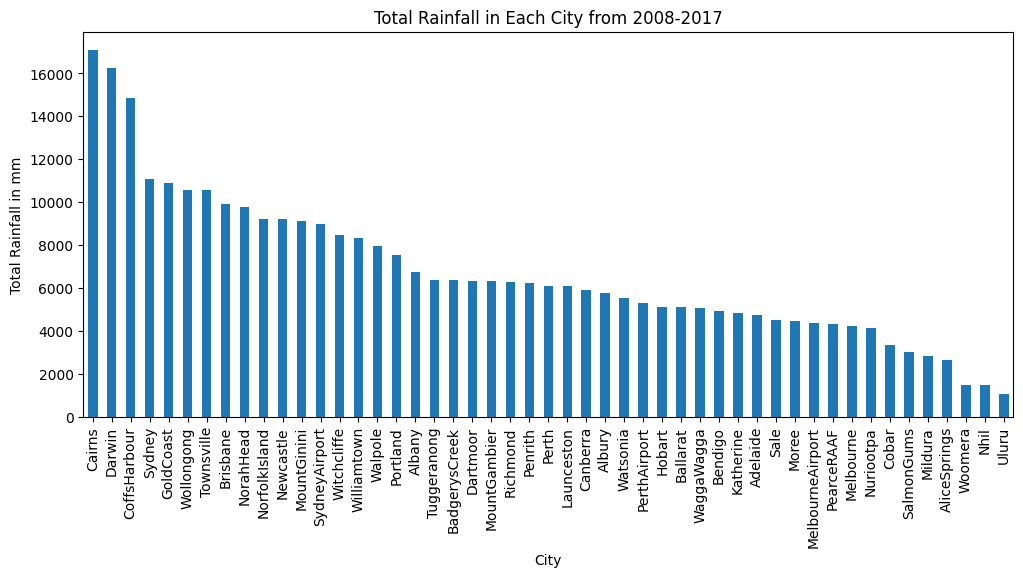

In [ ]:
weather_df.groupby('Location')['Rainfall'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5),
                                                                                   title='Total Rainfall in Each City from 2008-2017',
                                                                                   xlabel='City', ylabel='Total Rainfall in mm')


<Axes: title={'center': 'Rainfall from 2009-2017 in Woomera vs Cairns'}, xlabel='Year', ylabel='Rainfall in mm'>

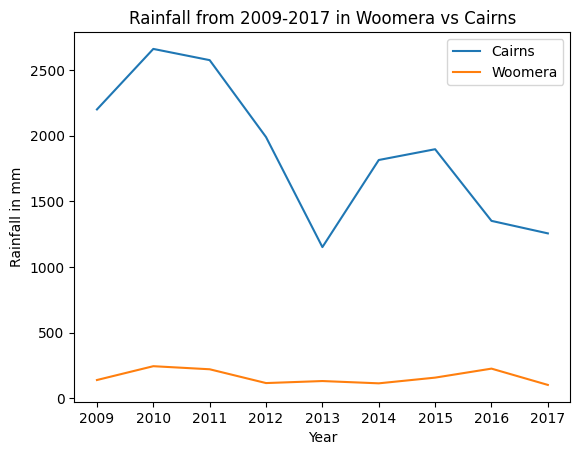

In [ ]:
# weather_df

cairns = weather_df[weather_df.Location == 'Cairns']

years = []
for date in cairns.Date:
  year = date[0:4]
  years.append(year)

cairns.insert(2,"Year", years)
cairns2 = cairns[cairns.Year != '2008']

woomera = weather_df[weather_df.Location == 'Woomera']

years2 = []
for date in woomera.Date:
  year = date[0:4]
  years2.append(year)

woomera.insert(2,"Year", years2)

cairns2.groupby("Year")["Rainfall"].sum().plot(title='Rainfall from 2009-2017 in Woomera vs Cairns', ylabel='Rainfall in mm',
                                               legend='Best', label='Cairns')

woomera.groupby("Year")["Rainfall"].sum().plot(legend='Best', label='Woomera')

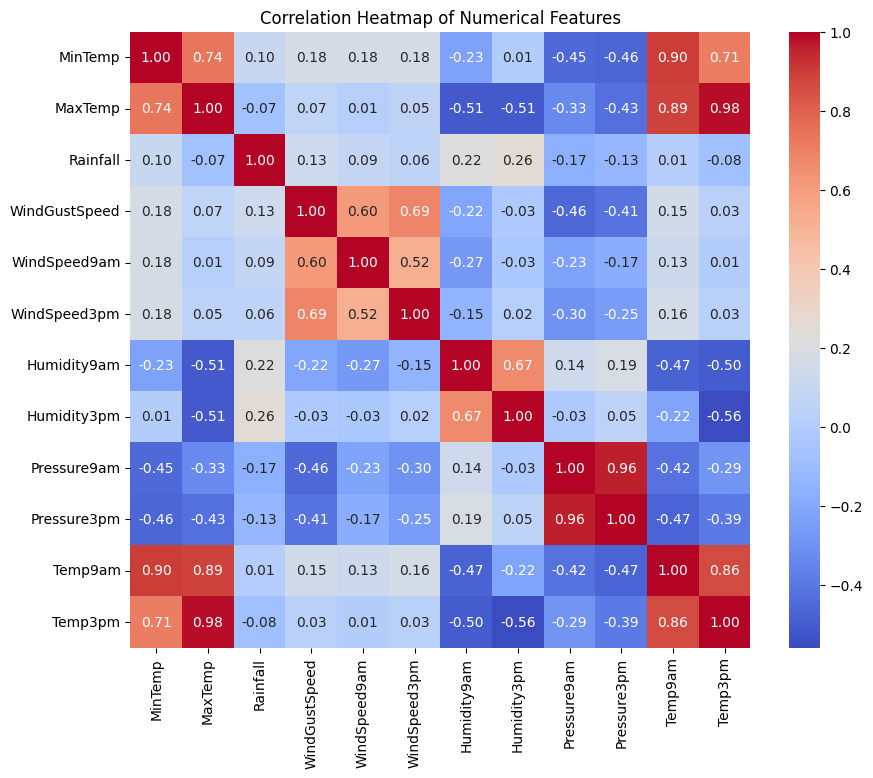

In [ ]:
# Calculate correlations
corr = weather_df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Some columns are highly correlated, so we drop Pressure9am, Temp9am, and Temp3pm.


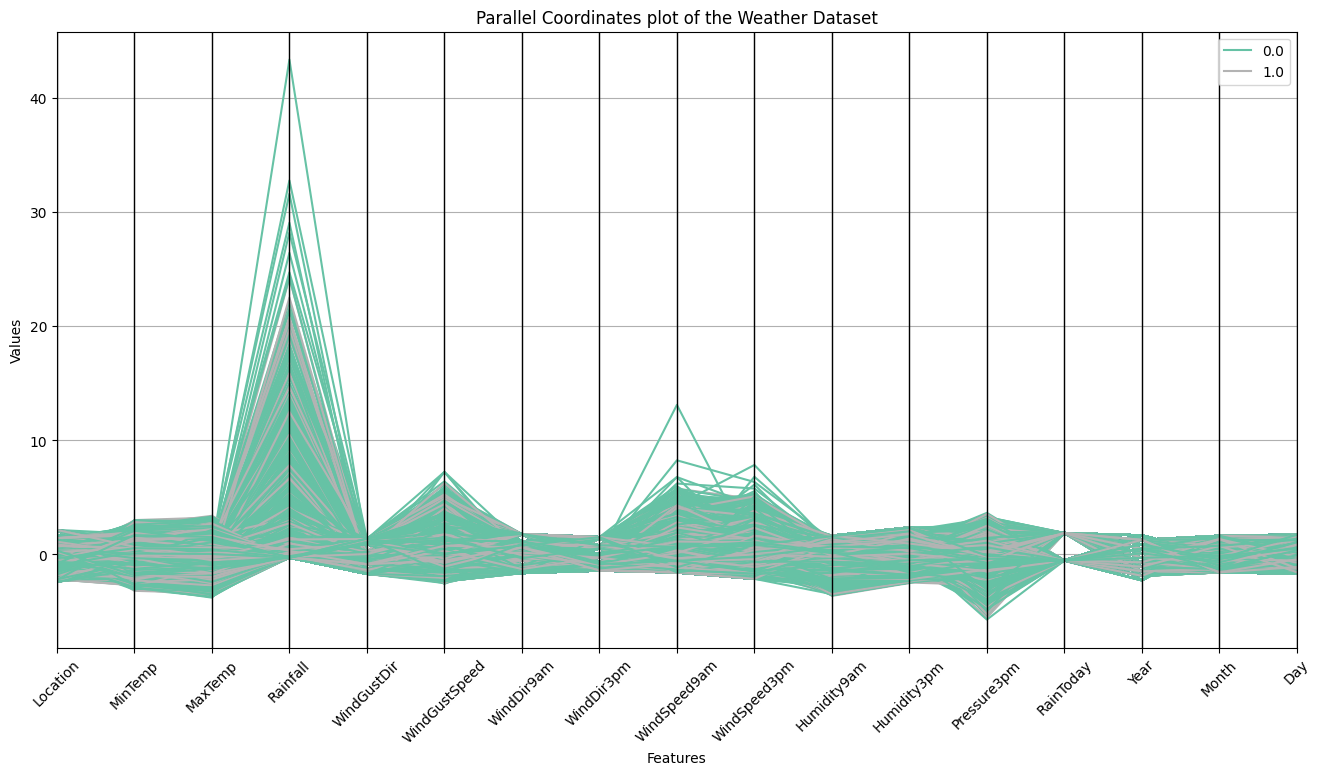

In [ ]:
from pandas.plotting import parallel_coordinates
# select_cols = weather_df.select_dtypes(include=['float64', 'int64']).columns
# select_cols = select_cols.append(pd.Index(['RainTomorrow']))
# df_num = weather_df[select_cols]
# df_num = df_num.fillna(0)
df_num = pd.concat([X_dev, pd.Series(y_dev)], axis=1)
df_num.rename(columns={df_num.columns[-1]: 'RainTomorrow'}, inplace=True)
df_num.dropna(inplace=True)
plt.figure(figsize=(16, 8))
parallel_coordinates(df_num, 'RainTomorrow', colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=45)
plt.title('Parallel Coordinates plot of the Weather Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()

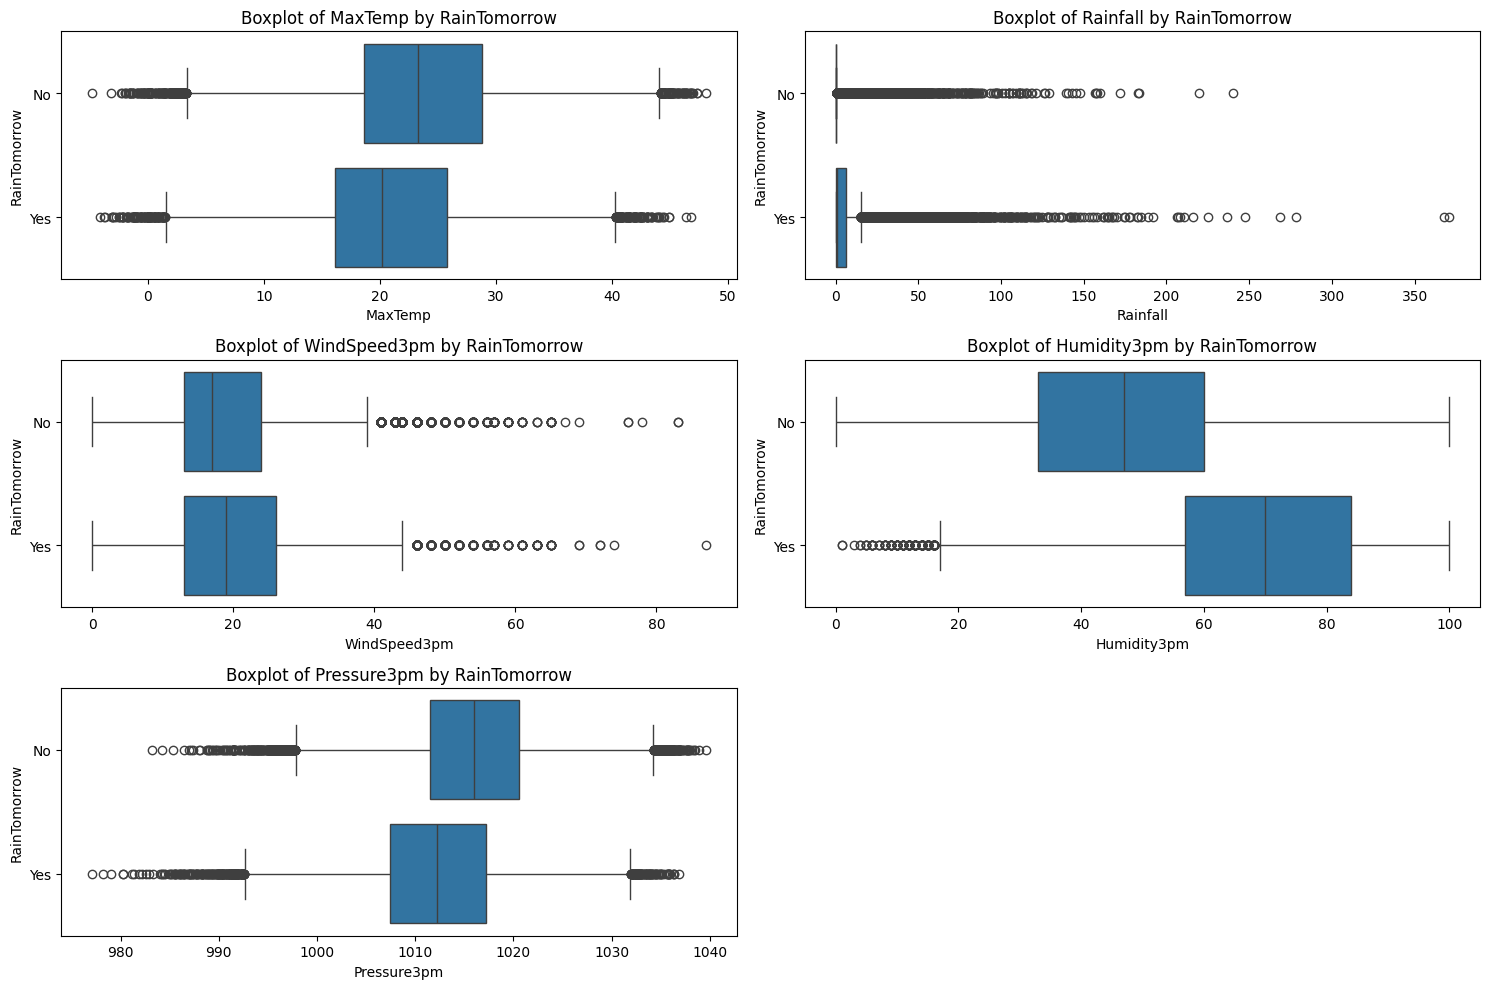

In [ ]:
selected_variables = ['MaxTemp', 'Rainfall', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(selected_variables):
    plt.subplot(3, 2, i + 1)  # Adjust the grid size based on the number of variables
    sns.boxplot(y='RainTomorrow', x=variable, data=weather_df)
    plt.title(f'Boxplot of {variable} by RainTomorrow')

plt.tight_layout()
plt.show()

### Model Training

#### Approach 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

print(f"x_dev: {X_dev.shape}, y_dev: {y_dev.shape},x_test: {X_test.shape},y_test: {y_test.shape}")

x_dev: (113754, 17), y_dev: (113754,),x_test: (28439, 17),y_test: (28439,)


In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
log_reg.fit(X_dev, y_dev)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22064
           1       0.72      0.47      0.57      6375

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



#### Approach 2: CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.utils.class_weight import compute_class_weight


print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(X_dev.shape, y_dev.shape, X_test.shape, y_test.shape))
Y_dev = to_categorical(y_dev, num_classes=2)
Y_test = to_categorical(y_test, num_classes=2)

x_dev: (113754, 17),y_dev: (113754,),x_test: (28439, 17),y_test: (28439,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, Y_dev,test_size = 0.2, random_state = 42)

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_dev.shape[1], 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
711/711 [==============================] - 7s 7ms/step - loss: 0.5829 - accuracy: 0.7345 - val_loss: 0.4850 - val_accuracy: 0.7910 - lr: 0.0010
Epoch 2/20
711/711 [==============================] - 7s 11ms/step - loss: 0.5239 - accuracy: 0.7708 - val_loss: 0.4591 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 3/20
711/711 [==============================] - 9s 12ms/step - loss: 0.5117 - accuracy: 0.7726 - val_loss: 0.4559 - val_accuracy: 0.7966 - lr: 0.0010
Epoch 4/20
711/711 [==============================] - 10s 14ms/step - loss: 0.5077 - accuracy: 0.7775 - val_loss: 0.4822 - val_accuracy: 0.7679 - lr: 0.0010
Epoch 5/20
711/711 [==============================] - 10s 14ms/step - loss: 0.5040 - accuracy: 0.7772 - val_loss: 0.4660 - val_accuracy: 0.7835 - lr: 0.0010
Epoch 6/20
710/711 [============================>.] - ETA: 0s - loss: 0.4999 - accuracy: 0.7781
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
711/711 [==============================] - 8s 

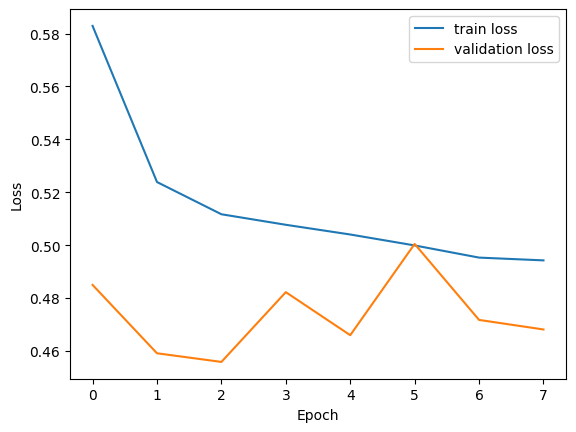

In [ ]:
hist = pd.DataFrame(history.history)
fig, ax = plt.subplots()
ax.plot(hist.index, hist["loss"], label="train loss")
ax.plot(hist.index, hist["val_loss"], label="validation loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

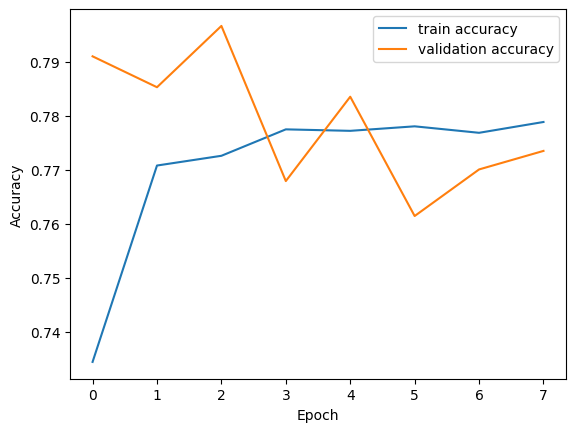

In [ ]:
fig, ax = plt.subplots()
ax.plot(hist.index, hist["accuracy"], label="train accuracy")
ax.plot(hist.index, hist["val_accuracy"], label="validation accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.45268577337265015
Test accuracy: 0.7996413111686707


In [ ]:
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_label = np.argmax(Y_test, axis=1)

889/889 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score

print("Recall:")
print(recall_score(y_label, y_pred))

print("Classification Report:")
print(classification_report(y_label, y_pred))

Recall:
0.7275294117647059
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     22064
           1       0.54      0.73      0.62      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.77      0.74     28439
weighted avg       0.83      0.80      0.81     28439



#### Approach 3: XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

unique, counts = np.unique(y_dev, return_counts=True)
print("Original y distribution:")
print(dict(zip(unique, counts)))

print("New y distribution:")
print(pd.Series(y_dev_smote).value_counts())

Original y distribution:
{0: 88252, 1: 25502}
New y distribution:
RainTomorrow
0    88252
1    88252
Name: count, dtype: int64


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1]
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_dev_smote, y_dev_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [6, 9, 12], 'n_estimators': [300, 500],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(recall_score), verbose=2)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 300, 'subsample': 0.8}
Best recall score: 0.8268579933202919


In [ ]:
# XGBoost: parameter from gridsearch
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score

xgbc = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
                        n_estimators=300, max_depth=12, subsample=0.8, learning_rate=0.01, gamma=0)
xgbc.fit(X_dev_smote, y_dev_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# # XGBoost
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, recall_score

# xgbc = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
#                         n_estimators=500, max_depth=9, subsample=1.0, learning_rate=0.1, gamma=0,
#                         reg_lambda=0, reg_alpha=1)
# xgbc.fit(X_dev_smote, y_dev_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgbc.predict(X_dev_smote)
print(f'Train Accuracy: {accuracy_score(y_dev_smote, y_pred)}')
print(f'Train Recall: {recall_score(y_dev_smote, y_pred)}')

y_pred = xgbc.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Test Recall: {recall_score(y_test, y_pred)}')

Train Accuracy: 0.9198545075465712
Train Recall: 0.9102569913429724
Test Accuracy: 0.8437357150392067
Test Recall: 0.6523921568627451


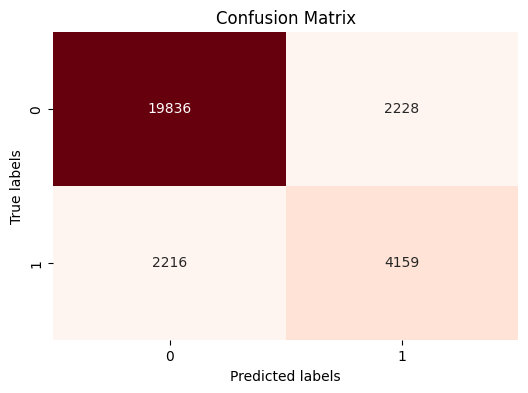

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
creport = classification_report(y_test, y_pred)
print("Classification Report:\n", creport)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     22064
           1       0.65      0.65      0.65      6375

    accuracy                           0.84     28439
   macro avg       0.78      0.78      0.78     28439
weighted avg       0.84      0.84      0.84     28439



In [ ]:
importances = xgbc.feature_importances_
feature_names = X_dev_smote.columns

features_importances = zip(feature_names, importances)
sorted_features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_features_importances]
sorted_importances = [item[1] for item in sorted_features_importances]

print("Feature importances:")
for name, importance in zip(sorted_feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

Feature importances:
Humidity3pm: 0.3113
Rainfall: 0.2059
WindGustSpeed: 0.0835
WindDir3pm: 0.0569
Pressure3pm: 0.0439
RainToday: 0.0388
WindSpeed3pm: 0.0361
Month: 0.0316
WindDir9am: 0.0313
WindGustDir: 0.0289
Location: 0.0235
WindSpeed9am: 0.0217
MaxTemp: 0.0204
Humidity9am: 0.0184
MinTemp: 0.0175
Year: 0.0174
Day: 0.0129


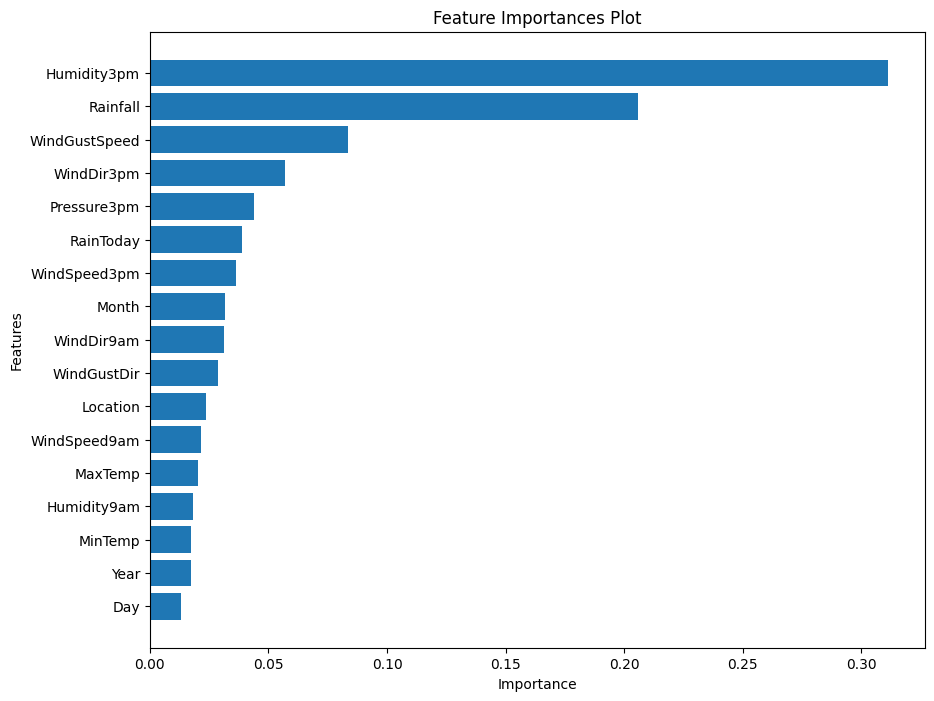

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances Plot')
plt.gca().invert_yaxis()
plt.show()

#### Approach 4: Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# SVM with commonly used hyper-parameter values for handling un-balanced datasets
# Please note that grid search/random search is not performed here as it takes up lot of compute resources,
# and lot of time as well

# When we set gamma to 'scale', it automatically adjusts the kernel coefficient based on our data's features and their variability.
# This ensures a balanced influence of features on the model's decision-making process, making our job simpler by handling the fine-tuning automatically.
svm_classifier = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)

# Train the SVC model
svm_classifier.fit(X_dev, y_dev)


SVC(class_weight='balanced', random_state=42)

In [ ]:
y_pred_train = svm_classifier.predict(X_dev)
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the model
print("Classification Report on Train set")
print(classification_report(y_dev, y_pred_train))

print("Classification Report on Test set")
print(classification_report(y_test, y_pred_test))

Classification Report on Train set
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     88252
           1       0.55      0.78      0.64     25502

    accuracy                           0.81    113754
   macro avg       0.74      0.80      0.75    113754
weighted avg       0.84      0.81      0.82    113754

Classification Report on Test set
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     22064
           1       0.54      0.77      0.63      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
# Using SMOTE dataset to evaluate performance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("Original y distribution:")
print(y_dev.value_counts())

print("New y distribution:")
print(pd.Series(y_dev_smote).value_counts())

Original y distribution:
RainTomorrow
0    88252
1    25502
Name: count, dtype: int64
New y distribution:
RainTomorrow
0    88252
1    88252
Name: count, dtype: int64


In [ ]:
# SVM with commonly used hyper-parameter values for handling un-balanced datasets
svm_classifier_smote = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale', random_state=42)

# Train the SVC model on SMOTE dataset
svm_classifier_smote.fit(X_dev_smote, y_dev_smote)
y_pred_train_smote = svm_classifier_smote.predict(X_dev_smote)
y_pred_test_smote = svm_classifier_smote.predict(X_test)


In [ ]:
# Evaluate the model
print("Classification Report on Train set (SMOTE)")
print(classification_report(y_dev_smote, y_pred_train_smote))

print("Classification Report on Test set (SMOTE)")
print(classification_report(y_test, y_pred_test_smote))

Classification Report on Train set (SMOTE)
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     88252
           1       0.81      0.80      0.81     88252

    accuracy                           0.81    176504
   macro avg       0.81      0.81      0.81    176504
weighted avg       0.81      0.81      0.81    176504

Classification Report on Test set (SMOTE)
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     22064
           1       0.54      0.76      0.63      6375

    accuracy                           0.80     28439
   macro avg       0.73      0.79      0.75     28439
weighted avg       0.84      0.80      0.81     28439



In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_test)
recall_smote = recall_score(y_test, y_pred_test_smote)

# Recall is the right metric to use as we have an imbalanced dataset, and we aim to minimize false negatives

print("Recall on test:", recall)
print("Recall on test (SMOTE):", recall_smote)

Recall on test: 0.7654901960784314
Recall on test (SMOTE): 0.7625098039215686


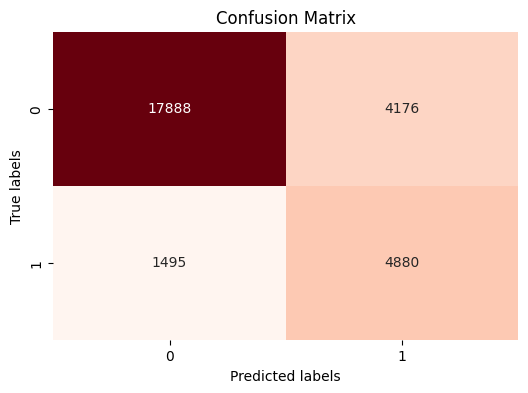

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

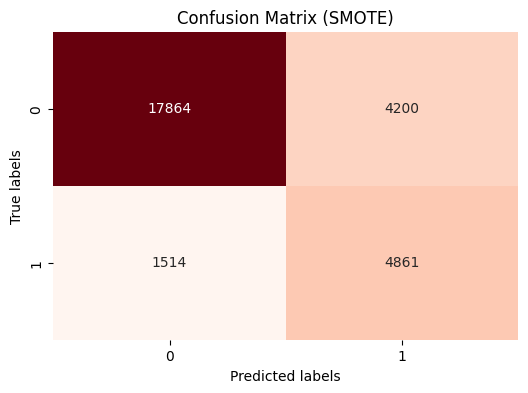

In [ ]:
cm_smote = confusion_matrix(y_test, y_pred_test_smote)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

#### Approach 5: Decision Tree Classifier

In [ ]:
# BASIC DTC

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

DTC = DecisionTreeClassifier(max_depth=10, random_state=42)

basicDTC_recall = cross_val_score(DTC, X_dev, y_dev, scoring="recall", cv = StratifiedKFold())
print("Recall score for each fold:", basicDTC_recall)
print("Average Recall score across folds:", basicDTC_recall.mean())

Recall score for each fold: [0.47784314 0.47039216 0.47578906 0.48363066 0.49196078]
Average Recall score across folds: 0.4799231600109167


In [ ]:
# BALANCED DTC

DTCbal = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')

balancedDTC_recall = cross_val_score(DTCbal, X_dev, y_dev, scoring="recall", cv = StratifiedKFold())
print("Recall score for each fold:", balancedDTC_recall)
print("Average Recall score across folds:", balancedDTC_recall.mean())

Recall score for each fold: [0.72568627 0.72313725 0.72985689 0.73377769 0.73921569]
Average Recall score across folds: 0.7303347594281784


In [ ]:
# OVERSAMPLING

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)

X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)
print('The shape of the development set:', X_dev_oversample.shape)

DTCoversampled = DecisionTreeClassifier(max_depth=10, random_state=42)

oversampledDTC_recall = cross_val_score(DTCoversampled, X_dev_oversample, y_dev_oversample, scoring="recall", cv = StratifiedKFold())
print("Recall score for each fold:", oversampledDTC_recall)
print("Average Recall score across folds:", oversampledDTC_recall.mean())

The shape of the development set: (176504, 17)
Recall score for each fold: [0.76328612 0.77467422 0.77814288 0.79655544 0.80730878]
Average Recall score across folds: 0.7839934878377635


In [ ]:
# UNDERSAMPLING

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)

X_dev_undersample, y_dev_undersample = rus.fit_resample(X_dev, y_dev)
print('The shape of the development set:', X_dev_undersample.shape)

DTCundersampled = DecisionTreeClassifier(max_depth=10, random_state=42)

undersampledDTC_recall = cross_val_score(DTCundersampled, X_dev_undersample, y_dev_undersample, scoring="recall", cv = StratifiedKFold())
print("Recall score for each fold:", undersampledDTC_recall)
print("Average Recall score across folds:", undersampledDTC_recall.mean())

The shape of the development set: (51004, 17)
Recall score for each fold: [0.72647059 0.71117647 0.74906881 0.72868065 0.75254902]
Average Recall score across folds: 0.7335891078642788


In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_dev_SMOTEsample, y_dev_SMOTEsample = smote.fit_resample(X_dev, y_dev)
print('The shape of the X_development set:', X_dev_SMOTEsample.shape)

DTCsmote = DecisionTreeClassifier(max_depth=10, random_state=42)

smoteDTC_recall = cross_val_score(DTCsmote, X_dev_SMOTEsample, y_dev_SMOTEsample, scoring="roc_auc", cv = StratifiedKFold())
print("Recall score for each fold:", smoteDTC_recall)
print("Average Recall score across folds:", smoteDTC_recall.mean())

The shape of the X_development set: (176504, 17)
Recall score for each fold: [0.81663757 0.88077688 0.91583715 0.91526842 0.91648757]
Average Recall score across folds: 0.8890015177854801
